In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [120]:
insurance = pd.read_csv(
    'insurance.csv')
print(insurance.head(3))

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620


In [122]:
# Plotting functions 

def graph_func (type, df, colx, coly, name):
    if (type == 'scatter'):
        plt.scatter(x = df[colx], y = df[coly])
    elif (type == 'box'):
        sns.boxplot(x=colx, y=coly, data=df)
    elif (type=='hist'):
        plt.hist(df[colx])
    plt.title(name)
    plt.xlabel(str(colx))
    plt.ylabel(str(coly))
    plt.show()
    plt.close()

def pivot_func (df, cols, rows):
    unpivoted = df.groupby([cols, rows])['charges'].mean().reset_index()
    pivoted = unpivoted.pivot(columns = cols,
                         index = rows,
                         values = 'charges')
    print("Pivot table for " + cols + ' against ' + rows + ', and their average charge:') 
    print(pivoted)

def coningency_func (df, rows, cols):
    contingency = pd.crosstab(df[rows], df[cols])
    print("The number of {} by number of {}:".format(cols, rows))
    print(contingency)

In [124]:
# Analysis functions 
def age_analysis (df, name):
    max_age = df.age.max()
    min_age = df.age.min()
    range_of_ages = max_age - min_age
    average_age = df.age.mean()
    
    print("Age analysis for {}:".format(name))
    print('The maximum age of {} is {} years old.'.format(name, max_age))
    print('The minimum age of {} is {} years old.'.format(name, min_age))
    print('The average age of {} is {:.4} years old.'.format(name, average_age))
    print("The range of ages is {} years".format(range_of_ages))
    
def bmi_analysis(df, name):
    max_bmi = np.max(df.bmi)
    min_bmi = np.min(df.bmi)
    mean_bmi = df.bmi.mean()
    
    print("BMI analysis for {}:".format(name))
    print("Mean bmi: {:.2f}".format(mean_bmi))
    print("Max bmi: {:.2f}".format(max_bmi))
    print("Min bmi: {:.2f}".format(min_bmi))
    
def charges_analysis (df, name):    
    max_charge = np.max(df.charges)
    min_charge = np.min(df.charges)
    mean_charge = df.charges.mean()
    
    print("CHARGE analysis for {}:".format(name))
    print("Mean charge for {}: ${:.2f}".format(name, mean_charge))
    print("Max charge for {}: ${:.2f}".format(name, max_charge))
    print("Min charge for {}: ${:.2f}".format(name, min_charge))
    
def smoking_analysis (df, name):
    total_num = df.charges.count()
    smokers = df[(df.smoker == 'yes')].charges.count()
    non_smokers = df[(df.smoker == 'no')].charges.count()
    smokers_percent = (smokers/total_num)*100
    non_smokers_percent = (non_smokers/total_num)*100
    
    print("SMOKING analysis for {}:".format(name))
    print("Smokers accout for {:.0f}, making up {:.2f}% of the group".format(smokers, smokers_percent))
    print("Non-smokers accout for {:.0f}, making up {:.2f}% of the group".format(non_smokers, non_smokers_percent))
    

def full_analysis (df, name):
    print("\nFULL analysis for {}:".format(name))
    age_analysis (df, name)
    bmi_analysis(df, name)
    charges_analysis (df, name)
    smoking_analysis (df, name)


FULL analysis for Whole group:
Age analysis for Whole group:
The maximum age of Whole group is 64 years old.
The minimum age of Whole group is 18 years old.
The average age of Whole group is 39.21 years old.
The range of ages is 46 years
BMI analysis for Whole group:
Mean bmi: 30.66
Max bmi: 53.13
Min bmi: 15.96
CHARGE analysis for Whole group:
Mean charge for Whole group: $13270.42
Max charge for Whole group: $63770.43
Min charge for Whole group: $1121.87
SMOKING analysis for Whole group:
Smokers accout for 274, making up 20.48% of the group
Non-smokers accout for 1064, making up 79.52% of the group


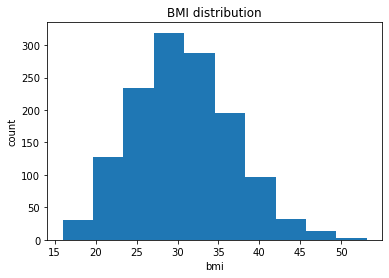

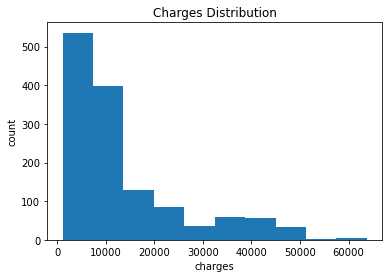

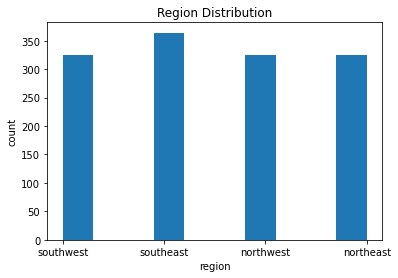

In [126]:
# Whole group analysis 

full_analysis(insurance, 'Whole group')
graph_func ('hist', insurance, 'bmi', 'count', 'BMI distribution')
graph_func ('hist', insurance, 'charges', 'count', 'Charges Distribution')
graph_func ('hist', insurance, 'region', 'count', 'Region Distribution')

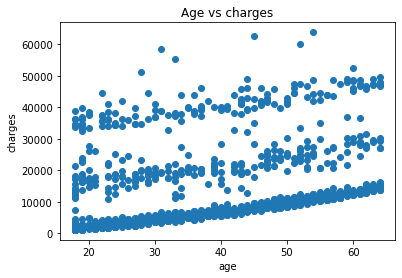

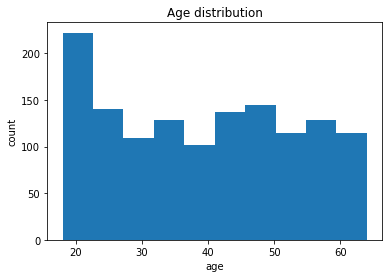

In [136]:
#  Age analysis of the data

graph_func('scatter', insurance, 'age', 'charges', 'Age vs charges')
graph_func('hist', insurance, 'age', 'count', 'Age distribution')


FULL analysis for men:
Age analysis for men:
The maximum age of men is 64 years old.
The minimum age of men is 18 years old.
The average age of men is 38.92 years old.
The range of ages is 46 years
BMI analysis for men:
Mean bmi: 30.94
Max bmi: 53.13
Min bmi: 15.96
CHARGE analysis for men:
Mean charge for men: $13956.75
Max charge for men: $62592.87
Min charge for men: $1121.87
SMOKING analysis for men:
Smokers accout for 159, making up 23.52% of the group
Non-smokers accout for 517, making up 76.48% of the group

FULL analysis for women:
Age analysis for women:
The maximum age of women is 64 years old.
The minimum age of women is 18 years old.
The average age of women is 39.5 years old.
The range of ages is 46 years
BMI analysis for women:
Mean bmi: 30.38
Max bmi: 48.07
Min bmi: 16.82
CHARGE analysis for women:
Mean charge for women: $12569.58
Max charge for women: $63770.43
Min charge for women: $1607.51
SMOKING analysis for women:
Smokers accout for 115, making up 17.37% of the gro

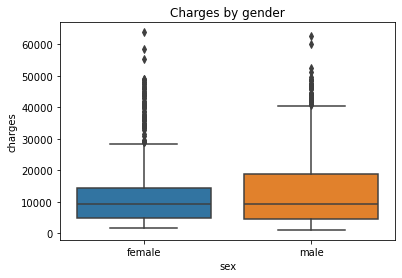

In [116]:
#  Gender analysis of the data
men = insurance[(insurance.sex == 'male')]
women = insurance[(insurance.sex == 'female')]
# Finding max and min values for ages
full_analysis(men, 'men')
full_analysis(women, 'women')

graph_func ('box', insurance,'sex', 'charges', 'Charges by gender')


FULL analysis for smokers:
Age analysis for smokers:
The maximum age of smokers is 64 years old.
The minimum age of smokers is 18 years old.
The average age of smokers is 38.51 years old.
The range of ages is 46 years
BMI analysis for smokers:
Mean bmi: 30.71
Max bmi: 52.58
Min bmi: 17.20
CHARGE analysis for smokers:
Mean charge for smokers: $32050.23
Max charge for smokers: $63770.43
Min charge for smokers: $12829.46
SMOKING analysis for smokers:
Smokers accout for 274, making up 100.00% of the group
Non-smokers accout for 0, making up 0.00% of the group

FULL analysis for non_smokers:
Age analysis for non_smokers:
The maximum age of non_smokers is 64 years old.
The minimum age of non_smokers is 18 years old.
The average age of non_smokers is 39.39 years old.
The range of ages is 46 years
BMI analysis for non_smokers:
Mean bmi: 30.65
Max bmi: 53.13
Min bmi: 15.96
CHARGE analysis for non_smokers:
Mean charge for non_smokers: $8434.27
Max charge for non_smokers: $36910.61
Min charge fo

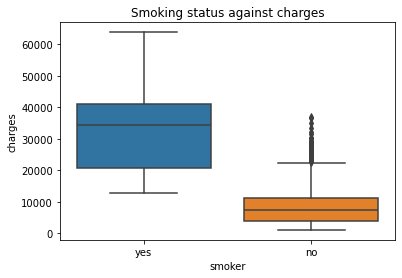

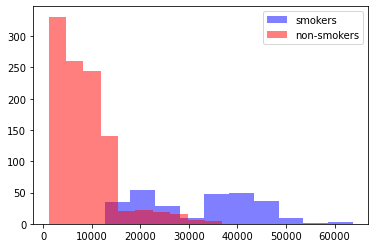

In [78]:
# Smoking analysis for the data
smokers = insurance[(insurance.smoker == 'yes')]
non_smokers = insurance[(insurance.smoker == 'no')]

full_analysis(smokers, 'smokers')
full_analysis(non_smokers, 'non_smokers')

graph_func ('box', insurance, 'smoker', 'charges', 'Smoking status against charges')

plt.hist(smokers.charges, color = 'blue', label = 'smokers', alpha = 0.5)
plt.hist(non_smokers.charges, color = 'red', label = 'non-smokers', alpha = 0.5)
plt.legend()
plt.show()
plt.close()



FULL analysis for super obese bmi:
Age analysis for super obese bmi:
The maximum age of super obese bmi is 64 years old.
The minimum age of super obese bmi is 18 years old.
The average age of super obese bmi is 40.58 years old.
The range of ages is 46 years
BMI analysis for super obese bmi:
Mean bmi: 43.10
Max bmi: 53.13
Min bmi: 40.15
CHARGE analysis for super obese bmi:
Mean charge for super obese bmi: $16784.62
Max charge for super obese bmi: $63770.43
Min charge for super obese bmi: $1146.80
SMOKING analysis for super obese bmi:
Smokers accout for 21, making up 23.08% of the group
Non-smokers accout for 70, making up 76.92% of the group


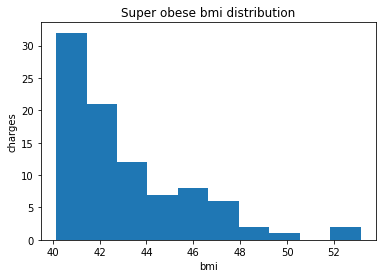


FULL analysis for obese bmi:
Age analysis for obese bmi:
The maximum age of obese bmi is 64 years old.
The minimum age of obese bmi is 18 years old.
The average age of obese bmi is 40.31 years old.
The range of ages is 46 years
BMI analysis for obese bmi:
Mean bmi: 34.11
Max bmi: 39.99
Min bmi: 30.00
CHARGE analysis for obese bmi:
Mean charge for obese bmi: $15370.29
Max charge for obese bmi: $62592.87
Min charge for obese bmi: $1131.51
SMOKING analysis for obese bmi:
Smokers accout for 124, making up 20.13% of the group
Non-smokers accout for 492, making up 79.87% of the group


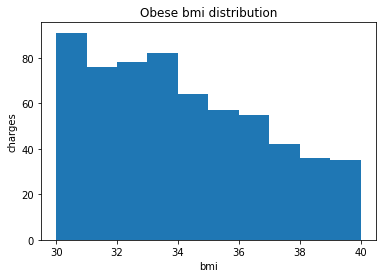


FULL analysis for overweight bmi:
Age analysis for overweight bmi:
The maximum age of overweight bmi is 64 years old.
The minimum age of overweight bmi is 18 years old.
The average age of overweight bmi is 38.92 years old.
The range of ages is 46 years
BMI analysis for overweight bmi:
Mean bmi: 27.60
Max bmi: 29.93
Min bmi: 25.00
CHARGE analysis for overweight bmi:
Mean charge for overweight bmi: $10987.51
Max charge for overweight bmi: $38245.59
Min charge for overweight bmi: $1252.41
SMOKING analysis for overweight bmi:
Smokers accout for 74, making up 19.17% of the group
Non-smokers accout for 312, making up 80.83% of the group


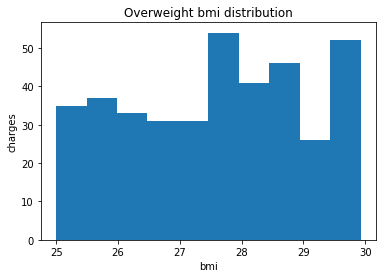


FULL analysis for normal bmi:
Age analysis for normal bmi:
The maximum age of normal bmi is 64 years old.
The minimum age of normal bmi is 18 years old.
The average age of normal bmi is 36.73 years old.
The range of ages is 46 years
BMI analysis for normal bmi:
Mean bmi: 22.62
Max bmi: 24.98
Min bmi: 18.50
CHARGE analysis for normal bmi:
Mean charge for normal bmi: $10409.34
Max charge for normal bmi: $35069.37
Min charge for normal bmi: $1121.87
SMOKING analysis for normal bmi:
Smokers accout for 50, making up 22.22% of the group
Non-smokers accout for 175, making up 77.78% of the group


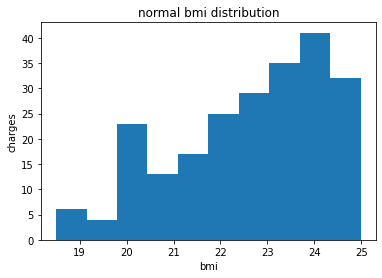


FULL analysis for underweight bmi:
Age analysis for underweight bmi:
The maximum age of underweight bmi is 60 years old.
The minimum age of underweight bmi is 18 years old.
The average age of underweight bmi is 32.35 years old.
The range of ages is 42 years
BMI analysis for underweight bmi:
Mean bmi: 17.57
Max bmi: 18.34
Min bmi: 15.96
CHARGE analysis for underweight bmi:
Mean charge for underweight bmi: $8852.20
Max charge for underweight bmi: $32734.19
Min charge for underweight bmi: $1621.34
SMOKING analysis for underweight bmi:
Smokers accout for 5, making up 25.00% of the group
Non-smokers accout for 15, making up 75.00% of the group


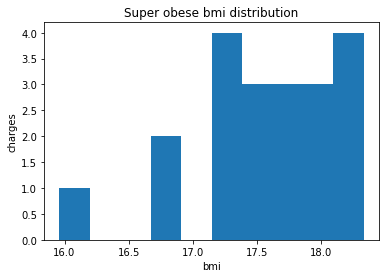

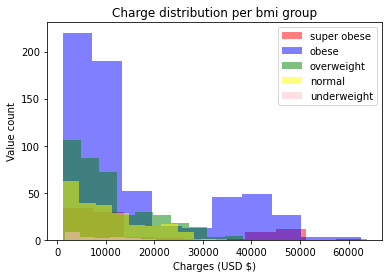

In [80]:
# BMI analysis for the data

super_obese_bmi = insurance[(insurance.bmi > 40)]
obese_bmi = insurance[(insurance.bmi >= 30) & (insurance.bmi < 40)]
overweight_bmi = insurance[(insurance.bmi >= 25) & (insurance.bmi < 30)]
normal_bmi = insurance[(insurance.bmi >= 18.5) & (insurance.bmi < 25)]
underweight_bmi = insurance[(insurance.bmi < 18.5)]

full_analysis(super_obese_bmi, 'super obese bmi')
graph_func ('hist', super_obese_bmi, 'bmi', 'charges', 'Super obese bmi distribution')
full_analysis(obese_bmi, 'obese bmi')
graph_func ('hist', obese_bmi, 'bmi', 'charges', 'Obese bmi distribution')
full_analysis(overweight_bmi, 'overweight bmi')
graph_func ('hist', overweight_bmi, 'bmi', 'charges', 'Overweight bmi distribution')
full_analysis(normal_bmi, 'normal bmi')
graph_func ('hist', normal_bmi, 'bmi', 'charges', 'normal bmi distribution')
full_analysis(underweight_bmi, 'underweight bmi')
graph_func ('hist', underweight_bmi, 'bmi', 'charges', 'Super obese bmi distribution')

plt.hist(super_obese_bmi.charges, color = 'red', label = 'super obese', alpha = 0.5)
plt.hist(obese_bmi.charges, color = 'blue', label = 'obese', alpha = 0.5)
plt.hist(overweight_bmi.charges, color = 'green', label = 'overweight', alpha = 0.5)
plt.hist(normal_bmi.charges, color = 'yellow', label = 'normal', alpha = 0.5)
plt.hist(underweight_bmi.charges, color = 'pink', label = 'underweight', alpha = 0.5)
plt.title("Charge distribution per bmi group")
plt.xlabel("Charges (USD $)")
plt.ylabel("Value count")
plt.legend()
plt.show()
plt.close()


FULL analysis for children:
Age analysis for children:
The maximum age of children is 64 years old.
The minimum age of children is 18 years old.
The average age of children is 39.78 years old.
The range of ages is 46 years
BMI analysis for children:
Mean bmi: 30.75
Max bmi: 52.58
Min bmi: 16.82
CHARGE analysis for children:
Mean charge for children: $13949.94
Max charge for children: $60021.40
Min charge for children: $1711.03
SMOKING analysis for children:
Smokers accout for 159, making up 20.81% of the group
Non-smokers accout for 605, making up 79.19% of the group

FULL analysis for no children:
Age analysis for no children:
The maximum age of no children is 64 years old.
The minimum age of no children is 18 years old.
The average age of no children is 38.44 years old.
The range of ages is 46 years
BMI analysis for no children:
Mean bmi: 30.55
Max bmi: 53.13
Min bmi: 15.96
CHARGE analysis for no children:
Mean charge for no children: $12365.98
Max charge for no children: $63770.43


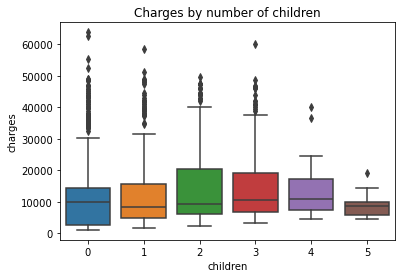

Pivot table for smoker against children, and their average charge:
smoker              no           yes
children                            
0          7611.793335  31341.363954
1          8303.109350  31822.654334
2          9493.093674  33844.235755
3          9614.519391  32724.915268
4         12121.344408  26532.276933
5          8183.845556  19023.260000
The number of children by number of smoker:
children    0    1    2    3   4   5
smoker                              
no        459  263  185  118  22  17
yes       115   61   55   39   3   1


In [82]:
# Parental status analysis
children = insurance[(insurance.children > 0)]
no_children = insurance[(insurance.children == 0)]

full_analysis(children, 'children')
full_analysis(no_children, 'no children')


graph_func ('box', insurance, 'children', 'charges', 'Charges by number of children')

pivot_func(insurance, 'smoker', 'children')
coningency_func (insurance, "smoker", "children")

['southwest' 'southeast' 'northwest' 'northeast']

FULL analysis for the Southeast:
Age analysis for the Southeast:
The maximum age of the Southeast is 64 years old.
The minimum age of the Southeast is 18 years old.
The average age of the Southeast is 38.94 years old.
The range of ages is 46 years
BMI analysis for the Southeast:
Mean bmi: 33.36
Max bmi: 53.13
Min bmi: 19.80
CHARGE analysis for the Southeast:
Mean charge for the Southeast: $14735.41
Max charge for the Southeast: $63770.43
Min charge for the Southeast: $1121.87
SMOKING analysis for the Southeast:
Smokers accout for 91, making up 25.00% of the group
Non-smokers accout for 273, making up 75.00% of the group


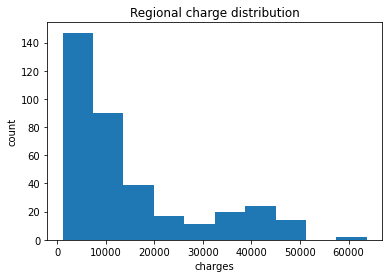


FULL analysis for the Southwest:
Age analysis for the Southwest:
The maximum age of the Southwest is 64 years old.
The minimum age of the Southwest is 19 years old.
The average age of the Southwest is 39.46 years old.
The range of ages is 45 years
BMI analysis for the Southwest:
Mean bmi: 30.60
Max bmi: 47.60
Min bmi: 17.40
CHARGE analysis for the Southwest:
Mean charge for the Southwest: $12346.94
Max charge for the Southwest: $52590.83
Min charge for the Southwest: $1241.57
SMOKING analysis for the Southwest:
Smokers accout for 58, making up 17.85% of the group
Non-smokers accout for 267, making up 82.15% of the group


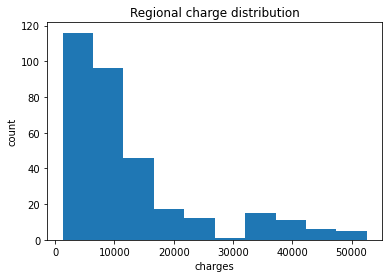


FULL analysis for the Northeast:
Age analysis for the Northeast:
The maximum age of the Northeast is 64 years old.
The minimum age of the Northeast is 18 years old.
The average age of the Northeast is 39.27 years old.
The range of ages is 46 years
BMI analysis for the Northeast:
Mean bmi: 29.17
Max bmi: 48.07
Min bmi: 15.96
CHARGE analysis for the Northeast:
Mean charge for the Northeast: $13406.38
Max charge for the Northeast: $58571.07
Min charge for the Northeast: $1694.80
SMOKING analysis for the Northeast:
Smokers accout for 67, making up 20.68% of the group
Non-smokers accout for 257, making up 79.32% of the group


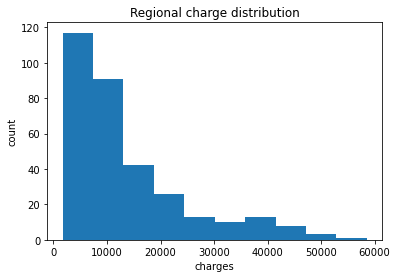


FULL analysis for the Northeast:
Age analysis for the Northeast:
The maximum age of the Northeast is 64 years old.
The minimum age of the Northeast is 18 years old.
The average age of the Northeast is 39.27 years old.
The range of ages is 46 years
BMI analysis for the Northeast:
Mean bmi: 29.17
Max bmi: 48.07
Min bmi: 15.96
CHARGE analysis for the Northeast:
Mean charge for the Northeast: $13406.38
Max charge for the Northeast: $58571.07
Min charge for the Northeast: $1694.80
SMOKING analysis for the Northeast:
Smokers accout for 67, making up 20.68% of the group
Non-smokers accout for 257, making up 79.32% of the group


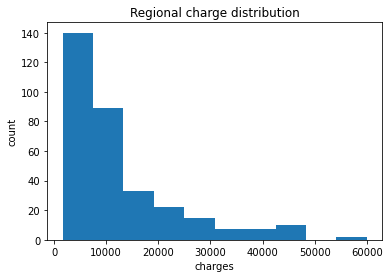


FULL analysis for the South:
Age analysis for the South:
The maximum age of the South is 64 years old.
The minimum age of the South is 18 years old.
The average age of the South is 39.18 years old.
The range of ages is 46 years
BMI analysis for the South:
Mean bmi: 32.05
Max bmi: 53.13
Min bmi: 17.40
CHARGE analysis for the South:
Mean charge for the South: $13608.77
Max charge for the South: $63770.43
Min charge for the South: $1121.87
SMOKING analysis for the South:
Smokers accout for 149, making up 21.63% of the group
Non-smokers accout for 540, making up 78.37% of the group


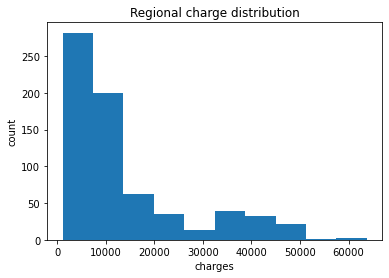


FULL analysis for the North:
Age analysis for the North:
The maximum age of the North is 64 years old.
The minimum age of the North is 18 years old.
The average age of the North is 39.23 years old.
The range of ages is 46 years
BMI analysis for the North:
Mean bmi: 29.19
Max bmi: 48.07
Min bmi: 15.96
CHARGE analysis for the North:
Mean charge for the North: $12911.22
Max charge for the North: $60021.40
Min charge for the North: $1621.34
SMOKING analysis for the North:
Smokers accout for 125, making up 19.26% of the group
Non-smokers accout for 524, making up 80.74% of the group


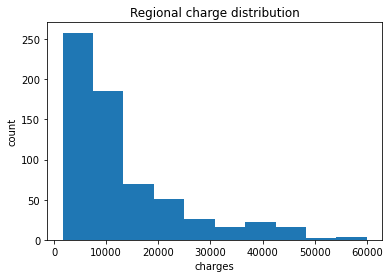

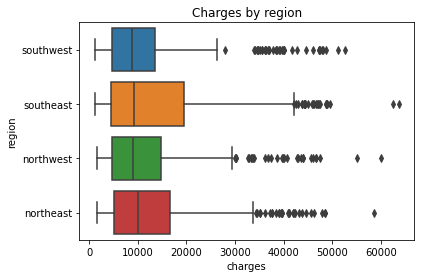

In [84]:
# Regional analysis
print(insurance.region.unique())

Southeast = insurance[(insurance.region == 'southeast')]
Southwest = insurance[(insurance.region == 'southwest')]
Northeast = insurance[(insurance.region == 'northeast')]
Northwest = insurance[(insurance.region == 'northwest')]

North = pd.concat([Northeast, Northwest])
South = pd.concat([Southeast, Southwest])

full_analysis(Southeast, 'the Southeast')
graph_func ('hist', Southeast, 'charges', 'count', 'Regional charge distribution')
full_analysis(Southwest, 'the Southwest')
graph_func ('hist', Southwest, 'charges', 'count', 'Regional charge distribution')
full_analysis(Northeast, 'the Northeast')
graph_func ('hist', Northeast, 'charges', 'count', 'Regional charge distribution')
full_analysis(Northeast, 'the Northeast')
graph_func ('hist', Northwest, 'charges', 'count', 'Regional charge distribution')
full_analysis(South, 'the South')
graph_func ('hist', South, 'charges', 'count', 'Regional charge distribution')
full_analysis(North, 'the North')
graph_func ('hist', North, 'charges', 'count', 'Regional charge distribution')

graph_func ('box', insurance, 'charges', 'region', 'Charges by region')
